In [1]:
#imports
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import re
#week 3
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
#week 4
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import p3_utils as ut

In [2]:
df = pd.read_csv('training_clean_2.csv')

In [3]:
df.head()

,id,keyword,location,text,target,all_text
0,1,nokeyword,nolocgiven,Our Deeds are the Reason of this earthquake Ma...,1,nokeyword nolocgiven Our Deeds are the Reason ...
1,4,nokeyword,nolocgiven,Forest fire near La Ronge Sask. Canada,1,nokeyword nolocgiven Forest fire near La Ronge...
2,5,nokeyword,nolocgiven,All residents asked to 'shelter in place' are ...,1,nokeyword nolocgiven All residents asked to 's...
3,6,nokeyword,nolocgiven,"13,000 people receive wildfires evacuation ord...",1,"nokeyword nolocgiven 13,000 people receive wil..."
4,7,nokeyword,nolocgiven,Just got sent this photo from Ruby Alaska as s...,1,nokeyword nolocgiven Just got sent this photo ...


In [4]:
train = df[['all_text', 'target']].copy()

In [5]:
train #preview

,all_text,target
0,nokeyword nolocgiven Our Deeds are the Reason ...,1
1,nokeyword nolocgiven Forest fire near La Ronge...,1
2,nokeyword nolocgiven All residents asked to 's...,1
3,"nokeyword nolocgiven 13,000 people receive wil...",1
4,nokeyword nolocgiven Just got sent this photo ...,1
...,...,...
7608,nokeyword nolocgiven Two giant cranes holding ...,1
7609,nokeyword nolocgiven atsymbol aria_ahrary atsy...,1
7610,nokeyword nolocgiven M1.94 [01:04 UTC]?5km S o...,1
7611,nokeyword nolocgiven Police investigating afte...,1


In [6]:
X = train['all_text']
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y, #try to keep proportion of 1 and 0 in both splits
                                                    random_state=17) #random state for reproducability

print( 
X_train.shape,
y_train.shape,
X_test.shape,
y_test.shape) #verify shapes look correct

(5709,) (5709,) (1904,) (1904,)


## Count Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   29.3s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   47.7s finished


The best parameters are: {'cvec__max_df': 0.7, 'cvec__max_features': 15000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 3), 'cvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

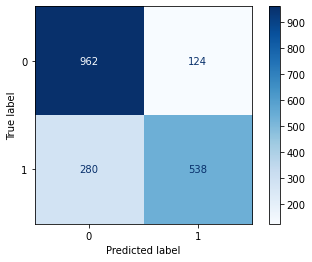

The Accurracy score is 0.7878151260504201
The Sensitivity score is 0.6577017114914425
The Precision score is 0.8126888217522659
____________________
Receiver Operating Characteristic (ROC) curve:


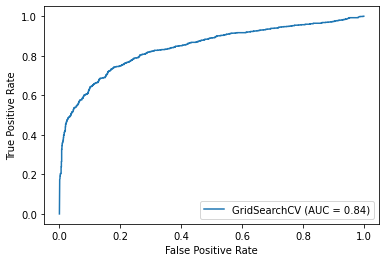

'Model scored!'

In [45]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Term Frequency Vectorizer, Naive Bayes

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   12.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   29.5s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   47.5s finished


The best parameters are: {'tvec__max_df': 0.7, 'tvec__max_features': 10000, 'tvec__min_df': 2, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': None}
The best training score was: 0.7971645912348372
The test score is: 0.789390756302521
____________________
Confusion Matrix for Test Set:


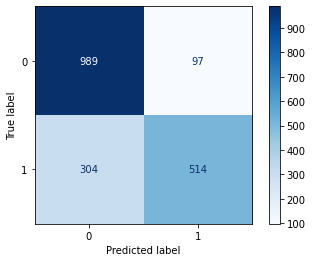

The Accurracy score is 0.789390756302521
The Sensitivity score is 0.628361858190709
The Precision score is 0.8412438625204582
____________________
Receiver Operating Characteristic (ROC) curve:


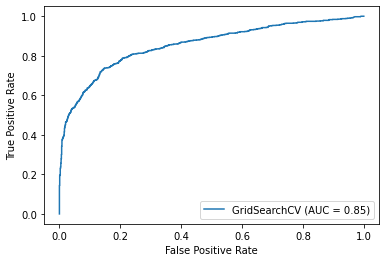

'Model scored!'

In [46]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Logistic Regression

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   16.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   39.8s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:  1.1min finished
C:\Users\willg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The best parameters are: {'cvec__max_df': 0.5, 'cvec__max_features': 12000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': None}
The best training score was: 0.7920860891067074
The test score is: 0.7851890756302521
____________________
Confusion Matrix for Test Set:


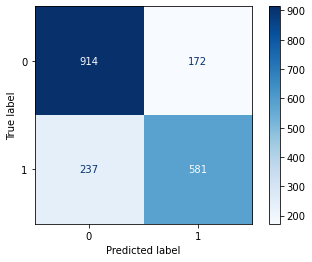

The Accurracy score is 0.7851890756302521
The Sensitivity score is 0.7102689486552567
The Precision score is 0.7715803452855245
____________________
Receiver Operating Characteristic (ROC) curve:


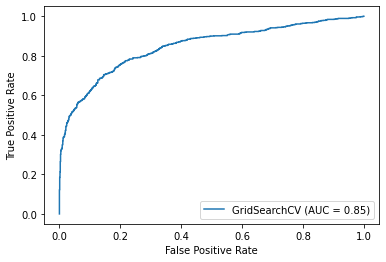

'Model scored!'

In [47]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'logreg'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

## Count Vectorizer, Random Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   22.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  4.2min
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:  6.8min finished


The best parameters are: {'tvec__max_df': 0.5, 'tvec__max_features': 20000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 2), 'tvec__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',

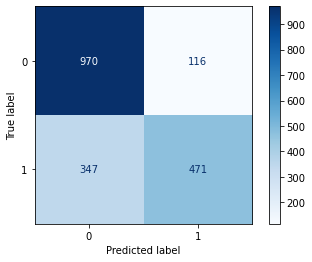

The Accurracy score is 0.756827731092437
The Sensitivity score is 0.5757946210268948
The Precision score is 0.8023850085178875
____________________
Receiver Operating Characteristic (ROC) curve:


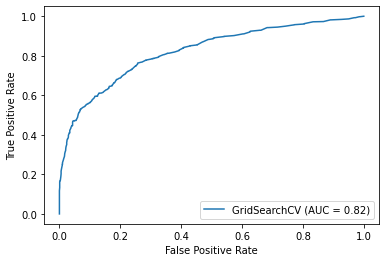

'Model scored!'

In [48]:
nltk_slist = stopwords.words('english')
maxfeats = [10_000, 12_000, 15_000, 20_000] #try different volume of features
mindf = [2, 4, 6] #minimum word frequency to be included in the model
maxdf = [.5, .7, .9] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'tvec' #count vectorizer
classifier = 'rf'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

The CVEC / NB model seemed to perform best so I'm going to see if I can tune the hyperparemeters to improve the accuracy score.  

As a reminder, these were the best parameters as selected by the grid search:  

The best parameters are: {'cvec__max_df': 0.5, 'cvec__max_features': 10000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'cvec__stop_words': sword list}
The best training score was: 0.7980382526158423
The test score is: 0.7935924369747899

changes for this run:  
- max feats running from 2k to 12k (previous best was 10k)
- mindf 2,3,4
- max df .25, .3, .4, .5 (previou best .5)
- ngrams (1,1), (1,2), (1,3)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:   16.7s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   40.7s
[Parallel(n_jobs=8)]: Done 1552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 2160 out of 2160 | elapsed:  1.7min finished


The best parameters are: {'cvec__max_df': 0.4, 'cvec__max_features': 4000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.802243093362967
The test score is: 0.8046218487394958
____________________
Confusion Matrix for Test Set:


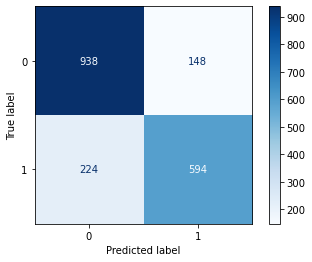

The Accurracy score is 0.8046218487394958
The Sensitivity score is 0.726161369193154
The Precision score is 0.8005390835579514
____________________
Receiver Operating Characteristic (ROC) curve:


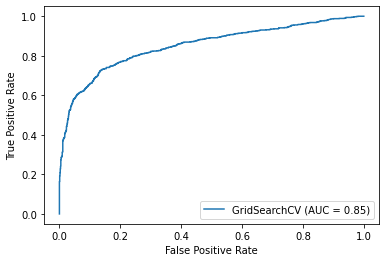

'Model scored!'

In [49]:
nltk_slist = stopwords.words('english')
maxfeats = [2_000, 4_000, 6_000, 8_000, 10_000, 12_000] #try different volume of features
mindf = [2, 3, 4] #minimum word frequency to be included in the model
maxdf = [.25, .3, .4, .5] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

^^^BEST SO FAR 2/24/21 4p

new adjustments:  
- maxfeats 1k, 1.5k, 2k, 2.5k, 3k, 3.5k, 4k, 4.5k

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:   16.3s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   40.1s
[Parallel(n_jobs=8)]: Done 1552 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 2242 tasks      | elapsed:  1.8min
[Parallel(n_jobs=8)]: Done 2792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=8)]: Done 2880 out of 2880 | elapsed:  2.3min finished


The best parameters are: {'cvec__max_df': 0.4, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.8034690128025467
The test score is: 0.8025210084033614
____________________
Confusion Matrix for Test Set:


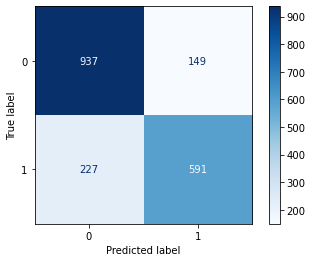

The Accurracy score is 0.8025210084033614
The Sensitivity score is 0.7224938875305623
The Precision score is 0.7986486486486486
____________________
Receiver Operating Characteristic (ROC) curve:


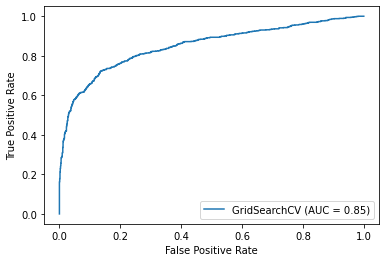

'Model scored!'

In [50]:
nltk_slist = stopwords.words('english')
maxfeats = [1_000, 1_500, 2_000, 2_500, 3_000, 3_500, 4_000, 4_500] #try different volume of features
mindf = [2, 3, 4] #minimum word frequency to be included in the model
maxdf = [.25, .3, .4, .5] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

Adjustments:  
- maxdf .1, .15, .20, .25, .3, .4
- mindf 1,2,3,4

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:   17.0s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   42.0s
[Parallel(n_jobs=8)]: Done 1552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=8)]: Done 2452 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 3552 tasks      | elapsed:  2.8min
[Parallel(n_jobs=8)]: Done 4320 out of 4320 | elapsed:  3.5min finished


The best parameters are: {'cvec__max_df': 0.4, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.8034690128025467
The test score is: 0.8025210084033614
____________________
Confusion Matrix for Test Set:


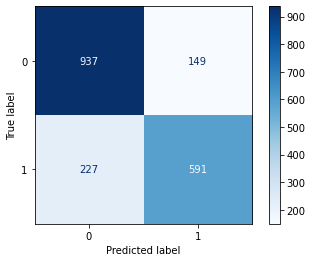

The Accurracy score is 0.8025210084033614
The Sensitivity score is 0.7224938875305623
The Precision score is 0.7986486486486486
____________________
Receiver Operating Characteristic (ROC) curve:


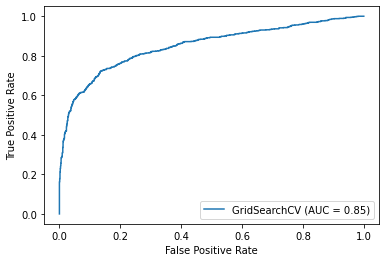

'Model scored!'

In [51]:
nltk_slist = stopwords.words('english')
maxfeats = [1_000, 1_500, 2_000, 2_500, 3_000, 3_500, 4_000, 4_500] #try different volume of features
mindf = [1, 2, 3] #minimum word frequency to be included in the model
maxdf = [.1, .15, .2, .25, .3, .4] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2), (1,3)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   15.8s
[Parallel(n_jobs=8)]: Done 720 out of 720 | elapsed:   25.9s finished


The best parameters are: {'cvec__max_df': 0.35, 'cvec__max_features': 3000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None}
The best training score was: 0.8034690128025467
The test score is: 0.8025210084033614
____________________
Confusion Matrix for Test Set:


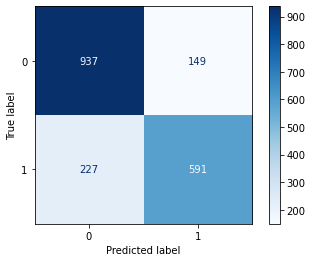

The Accurracy score is 0.8025210084033614
The Sensitivity score is 0.7224938875305623
The Precision score is 0.7986486486486486
____________________
Receiver Operating Characteristic (ROC) curve:


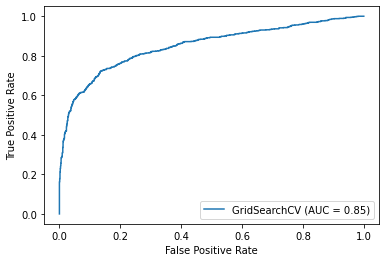

'Model scored!'

In [15]:
nltk_slist = stopwords.words('english')
maxfeats = [1_000, 2_000, 2_500, 3_000] #try different volume of features
mindf = [2, 3, 4] #minimum word frequency to be included in the model
maxdf = [.3, .35, .4] #cutoff for words more frequent than percentage (float) threshhold
ngrams = [(1,1), (1,2)] #range of combinations of words to try (minimum, maximum)
swords = [None, nltk_slist] #try None and a standard stop word list
scaler = 'cvec' #count vectorizer
classifier = 'nb'

pipe = ut.pipemaker(scaler, classifier)
params = ut.set_params(scaler, maxfeats, mindf, maxdf, swords, ngrams)

gs = GridSearchCV(pipe, params, #load hyperparameters
                  n_jobs=8,        #using 8 cores to process
                  cv=5, verbose=1) #using 5 folds and lower verbose to limit messages returned

gs.fit(X_train, y_train)

ut.score_model(gs, X_train, y_train, X_test, y_test)

My accuracy is not improving despite hyperparameter changes - I want to look at specifically the predictions that I'm getting wrong to see if there is any pattern or characteristics among the incorrect predictions.

In [25]:
predd = gs.best_estimator_.predict(X_test) #preds
y_test #actual
preddf = pd.DataFrame(data=predd, index = y_test.index, columns=['preds'])
preddf['actual'] = y_test
preddf #uses original index numbers so i can look up the corresponding text

,preds,actual
2602,1,1
847,0,0
3485,0,1
3268,1,1
5603,1,1
...,...,...
1130,0,0
5735,1,1
3263,0,0
6832,0,0


In [31]:
preddf['result'] = preddf['preds'] - preddf['actual'] #if they were the same (correct), result will be zero
preddf

,preds,actual,result
2602,1,1,0
847,0,0,0
3485,0,1,-1
3268,1,1,0
5603,1,1,0
...,...,...,...
1130,0,0,0
5735,1,1,0
3263,0,0,0
6832,0,0,0


In [33]:
f_preds = preddf[preddf['result']!=0].copy() #any non-zero return was an inaccurate prediction
f_preds

,preds,actual,result
3485,0,1,-1
149,1,0,1
11,0,1,-1
3924,0,1,-1
4435,0,1,-1
...,...,...,...
6248,0,1,-1
4872,1,0,1
2962,1,0,1
6691,0,1,-1


In [34]:
f_pos = f_preds[f_preds['result']==1] # predicted 1, actual was 0, difference will be 1 = false positives
f_neg = f_preds[f_preds['result']==-1] #predicted 0, actual was 1, difference will be -1 = false negatives

In [38]:
X_test[f_pos.index]

149     airplane percenttwenty accident y(our) boyfrie...
6276    storm Wilmington, NC New item: Pillow Covers A...
5641    refugees nolocgiven wowo--=== 12000 Nigerian r...
1993    damage nolocgiven Reusing advanced in life equ...
6835    trapped nolocgiven Hollywood Movie About Trapp...
                              ...                        
597     bioterror Atlanta, GA FedEx no longer will tra...
5083    nuclear percenttwenty disaster nolocgiven Nucl...
4872    mass percenttwenty murderer Hell Not only are ...
2962    drowning Chicago, IL Family mourns drowning of...
5713    rescuers nolocgiven I have an unexplainable de...
Name: all_text, Length: 149, dtype: object

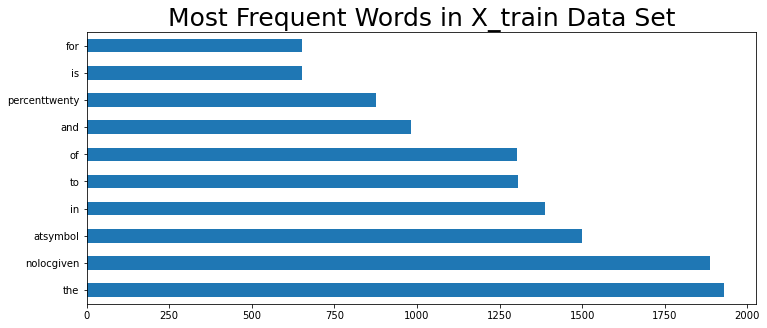

In [14]:
#using code from my previous reddit NLP project
scale_f = gs.best_estimator_.named_steps['cvec']
class_f = gs.best_estimator_.named_steps['nb']

XT_df = pd.DataFrame(scale_f.fit_transform(X_train).todense(), columns=scale_f.get_feature_names())
plt.figure(figsize=(12,5))
plt.title('Most Frequent Words in X_train Data Set', size=25)
#plt.xlabel('Number of Uses (out of 14,717 posts in training set)', size=20)
XT_df[XT_df>0]=1 #any words that appear more than once in the same post will count as 1 so we count per post
XT_df.sum().sort_values(ascending=False).head(10).plot(kind='barh')

In [11]:
#using code from my previous reddit NLP project
scale_f = gs.best_estimator_.named_steps['cvec']
class_f = gs.best_estimator_.named_steps['nb']

coef_df = pd.DataFrame(class_f.coef_, columns = scale_f.get_feature_names())

In [13]:
coef_df.sum().sort_values().head(25)

justinbieber   -10.578496
complete       -10.578496
loan           -10.578496
animalrescue   -10.578496
handbags       -10.578496
communities    -10.578496
bid            -10.578496
proof          -10.578496
jackson        -10.578496
beyond         -10.578496
beyhive        -10.578496
pop            -10.578496
combat         -10.578496
canaanites     -10.578496
unless         -10.578496
bet            -10.578496
mood           -10.578496
spend          -10.578496
color          -10.578496
guns           -10.578496
ends           -10.578496
member         -10.578496
tongue         -10.578496
mail           -10.578496
fantasy        -10.578496
dtype: float64